In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt
from scipy.integrate import odeint
from scipy import fftpack
from matplotlib.colors import LogNorm

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

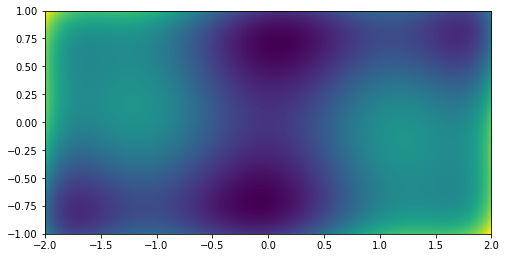

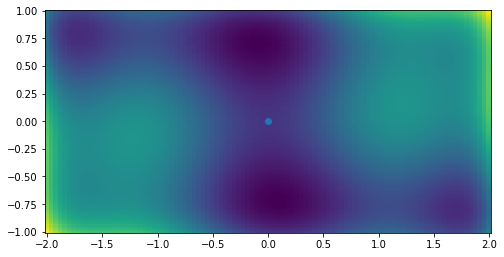

(x min, y min) : [-0.08984202  0.71265641] for which sh(x min, y min)= -1.0316284534898768
(x min, y min) : [ 0.08984201 -0.71265642] for which sh(x min, y min)= -1.0316284534898743
(x min, y min) : [-0.08984237  0.71265591] for which sh(x min, y min)= -1.0316284534871936
(x min, y min) : [ 0.08984236 -0.71265592] for which sh(x min, y min)= -1.0316284534873608


In [95]:
def sh(x):
    return ((4 - 2.1 * x[0] ** 2 + x[0] ** 4 / 3) * x[0] ** 2 + x[0] * x[1] + (4 * x[1] ** 2 - 4) * x[1] ** 2)


#variables
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)

#finding visually the regions
x1, y1 = np.meshgrid(x, y)
plt.figure(figsize=(8, 6))
z = sh([x1, y1])
plt.imshow(z, extent=[-2, 2, -1, 1])

x_min = opt.minimize(sh, x0=[0, 0])
plt.figure(figsize=(8, 6))
plt.pcolor(x1, y1, z)
plt.imshow(z, extent=[-2, 2, -1, 1])
plt.scatter(x_min.x[0], x_min.x[1])
plt.show()

xy_start = [[0, 0.75], [0, -0.75], [-2, 0.75], [2, -0.75]]

for i in xy_start:
    minima = opt.minimize(sh, i)
    print("(x min, y min) :", minima.x, "for which sh(x min, y min)=", minima.fun)

2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

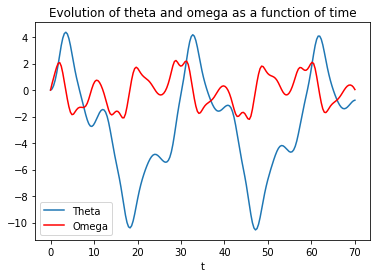

In [96]:
def pendulum(theta, time, Q, d, Omega):
    return theta[1], -theta[1] / Q + np.sin(theta[0]) + d * np.cos(Omega * time)

init_theta = (0, 0)
t = np.linspace(0, 70, 200)
result = odeint(pendulum, init_theta, t, args=(2.0, 1.5, 0.65))

plt.plot(t, result[:, 0], label="Theta")
plt.plot(t, result[:, 1], color='r', label="Omega")
plt.legend(loc='best')
plt.xlabel('t')
plt.title("Evolution of theta and omega as a function of time")

print()

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

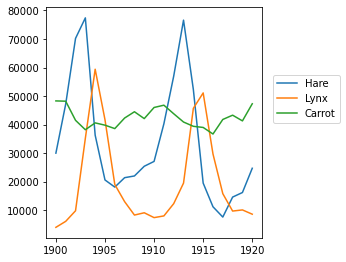

In [97]:


data = np.loadtxt('populations.txt')

year, hare, lynx, carrot = data.T  #columns to variables

plt.axes([0.2, 0.1, 0.5, 0.8])
plt.plot(year, hare, year, lynx, year, carrot)
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5))

plt.show()

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

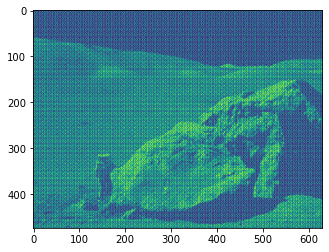

In [98]:

noisy_png = plt.imread("moonlanding.png")
plt.imshow(noisy_png)

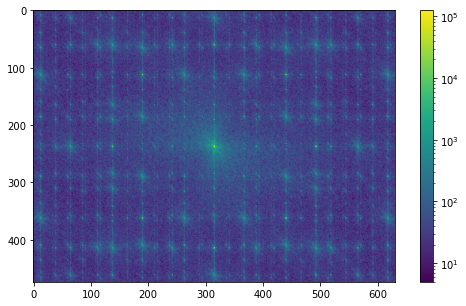

In [99]:
png_fft = fftpack.fftshift(fftpack.fft2(noisy_png))
amplitude = abs(png_fft)
plt.figure(figsize=(9,5))
plt.imshow(amplitude, norm=LogNorm(vmin=5))
plt.colorbar()

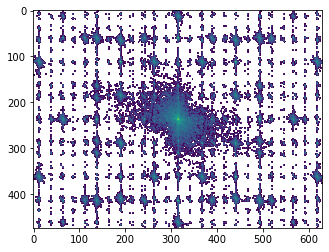

In [100]:

value = 100.
filt = np.where(amplitude <= value)
png_fft[filt] = 0
im_abs = np.abs(png_fft)
plt.imshow(im_abs, norm=LogNorm(vmin=5))


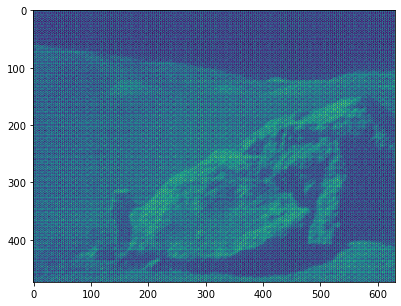

In [101]:
filtered_im = fftpack.ifft2(png_fft)
plt.figure(figsize=(9,5))
plt.imshow(np.abs(filtered_im))
plt.show()